In [1]:
#Importar librerias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats
from scipy.stats import exponweib
from scipy.optimize import fmin

In [6]:
#Importar los datos utilizados
#Tiempo entre fallas [En dias]
#[Para el conductor [CO-01]
datos = pd.read_csv('data.txt')
datos.shape

(15, 1)

In [7]:
datos.head()

,27.28541667
0,7.511806
1,26.034028
2,23.434722
3,8.968750
4,13.583333


In [8]:
#Transformar los datos a una matriz
x = datos.to_numpy()
#Ajustes de distribucion Weibull
#X son los datos
#Devuelve [forma,escala]
def fitweibull(x):
    def optfun(theta):
        return -np.sum(np.log(exponweib.pdf(x, 1, theta[0], scale = theta[1], loc = 0)))
    logx = np.log(x)
    shape = 1.2 / np.std(logx)
    scale = np.exp(np.mean(logx) + (0.572 / shape))
    return fmin(optfun, [shape, scale], xtol = 0.01, ftol = 0.01, disp = 0)
fitweibull(x)

array([ 0.70707586, 16.14833908])

La probabilidad de fallos es:
0.8264781246814806
La confiabilidad es
0.17352187531851937


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18724\2336559892.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist = 1, kde = True,
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18724\2336559892.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, hist = 1, kde = True,


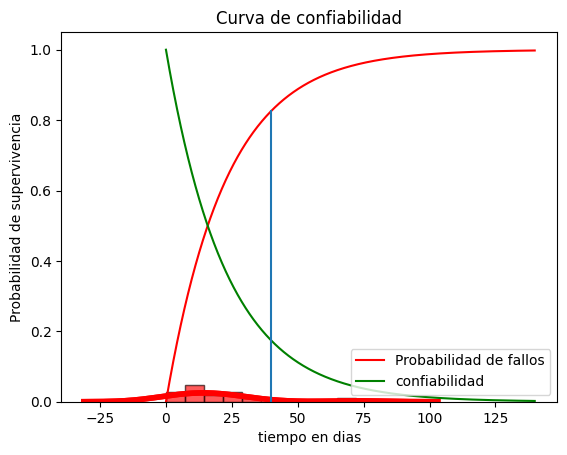

In [10]:
shape,scale = 0.70707586 , 16.14833908
#Histograma y funcion de densidad
sns.distplot(x, hist = 1, kde = True,
            bins = 10, color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws={'linewidth':4})
sns.distplot(x, hist = 1, kde = True,
            bins = 10, color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws={'linewidth':4})

#Curvas de confiabilidad y probrabilidad de fallos
#Creando el dominio "eje x"
xg = np.arange(0,140,0.1)
#Probabilidad acumulada
weibull = 1-np.exp(-xg/scale)**shape

#Curva de probablidad de fallos acumulados
z=40
pw=1-np.exp(-z/scale)**shape

plt.plot(xg,weibull,color='r',label='Probabilidad de fallos')
plt.plot(xg,1-weibull,color='g',label='confiabilidad')
plt.plot([z,z],[0,pw])
plt.legend(loc=4)
plt.show
plt.title('Curva de confiabilidad')
plt.xlabel('tiempo en dias')
plt.ylabel('Probabilidad de supervivencia')

print('La probabilidad de fallos es:')
print(pw)

print('La confiabilidad es')
print(1-pw)